####¡Muy buen apunte! 🙌
Si quieres contemplar prejubilación (antes de la edad legal de pensión), necesitamos que la simulación tenga en cuenta:

Edad actual: para no permitir retirarse antes de la edad en la que realmente estás hoy.
Prejubilación: si te retiras antes de la edad legal de pensión, tus ingresos se basan únicamente en tus ahorros + alquileres (u otros ingresos pasivos).
Edad legal de pensión: a partir de ahí se suman los ingresos de la pensión.
Aquí te dejo la versión ajustada de la clase con esa lógica integrada:

📅 Edad óptima estimada para retirarse: 47


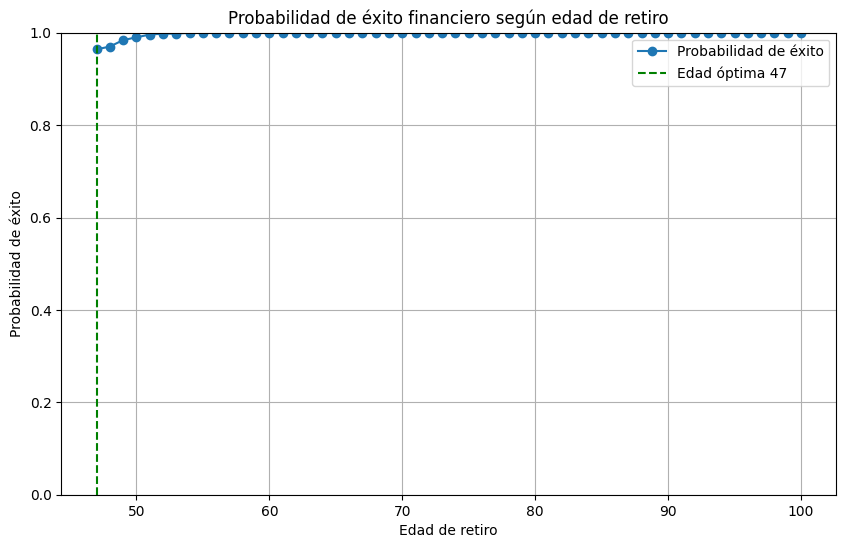

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ModeloFinanciero:
    def __init__(self, salario_inicial, patrimonio_inicial, anio_inicial, 
                 prestamo_inicial, alquiler1_inicial, alquiler2_inicial):
        self.salario_inicial = salario_inicial
        self.patrimonio_inicial = patrimonio_inicial
        self.anio_inicial = anio_inicial
        self.prestamo_inicial = prestamo_inicial
        self.alquiler1_inicial = alquiler1_inicial
        self.alquiler2_inicial = alquiler2_inicial

    # ------------------------------
    # Probabilidad de éxito por edad de retiro
    # ------------------------------
    def curva_probabilidad_retiro(self, salario, ahorro_inicial, gasto_anual, ahorro_deseado, 
                                  pension_anual=12000, edad_actual=40, edad_max=90, 
                                  edad_legal_pension=67,
                                  inflacion_media=0.02, rentabilidad_media=0.04, 
                                  simulaciones=500, umbral=0.9):
        """
        Simula probabilidad de éxito financiero por edad de jubilación
        y devuelve la edad óptima según un umbral de probabilidad.
        """
        edades = list(range(edad_actual, edad_max + 1))
        probabilidades = []

        for edad_retiro in edades:
            exitos = 0

            for _ in range(simulaciones):
                inflacion = np.random.normal(inflacion_media, 0.005)
                rentabilidad = np.random.normal(rentabilidad_media, 0.01)
                
                ahorro = ahorro_inicial

                # Simulación desde retiro hasta edad_max
                for edad in range(edad_retiro, edad_max + 1):
                    gastos = (gasto_anual + ahorro_deseado) * ((1 + inflacion) ** (edad - edad_retiro))

                    # Ingresos por alquileres
                    ingresos = (self.alquiler1_inicial + self.alquiler2_inicial) * ((1 + inflacion) ** (edad - edad_retiro))

                    # Añadir pensión solo si ya se alcanzó la edad legal
                    if edad >= edad_legal_pension:
                        ingresos += pension_anual * ((1 + inflacion) ** (edad - edad_legal_pension))

                    # Evolución del ahorro
                    ahorro = ahorro * (1 + rentabilidad) + ingresos - gastos
                    
                    if ahorro < 0:
                        break  
                else:
                    exitos += 1  

            prob_exito = exitos / simulaciones
            probabilidades.append(prob_exito)

        # Determinar edad óptima (mínima edad desde la actual que cumple el umbral)
        edad_optima = None
        for e, p in zip(edades, probabilidades):
            if p >= umbral:
                edad_optima = e
                break

        return edades, probabilidades, edad_optima

    def graficar_curva_retiro(self, edades, probabilidades, edad_optima=None):
        plt.figure(figsize=(10,6))
        plt.plot(edades, probabilidades, marker="o", label="Probabilidad de éxito")
        if edad_optima:
            plt.axvline(edad_optima, color="green", linestyle="--", label=f"Edad óptima {edad_optima}")
        plt.title("Probabilidad de éxito financiero según edad de retiro")
        plt.xlabel("Edad de retiro")
        plt.ylabel("Probabilidad de éxito")
        plt.grid(True)
        plt.ylim(0, 1)
        plt.legend()
        plt.show()


# --------------------------
# Ejemplo de uso
# --------------------------
modelo = ModeloFinanciero(
    salario_inicial=62955,
    patrimonio_inicial=530000,
    anio_inicial=2025,
    prestamo_inicial=130000,
    alquiler1_inicial=7800,
    alquiler2_inicial=0
)

edades, probs, edad_optima = modelo.curva_probabilidad_retiro(
    salario=30000,
    ahorro_inicial=530000,
    gasto_anual=20500,
    ahorro_deseado=4000,
    pension_anual=15000,   # pensión mínima simulada
    edad_actual=47,        # tu edad actual
    edad_max=100,
    edad_legal_pension=65,
    simulaciones=500,
    umbral=0.9
)

print("📅 Edad óptima estimada para retirarse:", edad_optima)
modelo.graficar_curva_retiro(edades, probs, edad_optima)


Bien. Quiero que añadas algunas tablas dinámicas e interactivas mediante Plotly y streamlit, mostrando información importante como desglose de ingresos anual, evolución del patrimonio en el tiempo, etc. Además quiero que los gráficos sean interactivos con plotly, tema oscuro, apto para daltónicos

In [4]:
import pandas as pd
import plotly.express as px
import streamlit as st

def simular_evolucion_patronal(self, salario, ahorro_inicial, gasto_anual, ahorro_deseado,
                                pension_anual=12000, edad_actual=40, edad_max=90,
                                edad_legal_pension=67, inflacion_media=0.02, rentabilidad_media=0.04):
    """Simula evolución patrimonial anual y devuelve DataFrame"""
    inflacion = inflacion_media
    rentabilidad = rentabilidad_media
    ahorro = ahorro_inicial

    datos = []

    for edad in range(edad_actual, edad_max + 1):
        gastos = (gasto_anual + ahorro_deseado) * ((1 + inflacion) ** (edad - edad_actual))
        ingresos = (self.alquiler1_inicial + self.alquiler2_inicial) * ((1 + inflacion) ** (edad - edad_actual))

        if edad >= edad_legal_pension:
            ingresos += pension_anual * ((1 + inflacion) ** (edad - edad_legal_pension))

        ahorro = ahorro * (1 + rentabilidad) + ingresos - gastos

        datos.append({
            "Edad": edad,
            "Ingresos": round(ingresos, 2),
            "Gastos": round(gastos, 2),
            "Patrimonio": round(ahorro, 2)
        })

    return pd.DataFrame(datos)

ModuleNotFoundError: No module named 'streamlit'

In [5]:
def graficar_evolucion(df):
    fig = px.line(df, x="Edad", y=["Ingresos", "Gastos", "Patrimonio"],
                  title="Evolución Financiera Anual",
                  labels={"value": "Euros", "variable": "Concepto"},
                  template="plotly_dark",
                  color_discrete_sequence=px.colors.qualitative.Safe)  # apto para daltónicos
    fig.update_layout(legend_title_text="Desglose")
    return fig

In [6]:
def mostrar_dashboard(modelo):
    st.set_page_config(layout="wide", page_title="Simulador Financiero", page_icon="💰")

    st.title("📈 Simulador Financiero Interactivo")
    st.markdown("Visualiza tu evolución patrimonial y probabilidad de retiro exitoso.")

    salario = st.number_input("Salario anual", value=modelo.salario_inicial)
    ahorro_inicial = st.number_input("Ahorro inicial", value=modelo.patrimonio_inicial)
    gasto_anual = st.number_input("Gasto anual estimado", value=24000)
    ahorro_deseado = st.number_input("Ahorro deseado anual", value=6000)

    df = modelo.simular_evolucion_patronal(salario, ahorro_inicial, gasto_anual, ahorro_deseado)
    fig = graficar_evolucion(df)

    st.plotly_chart(fig, use_container_width=True)

    st.dataframe(df.style.format({"Ingresos": "€{:.2f}", "Gastos": "€{:.2f}", "Patrimonio": "€{:.2f}"}))

In [11]:
def resumen_por_decada(df):
    df["Decada"] = (df["Edad"] // 10) * 10
    resumen = df.groupby("Decada").agg({
        "Ingresos": "mean",
        "Gastos": "mean",
        "Patrimonio": "last"
    }).reset_index()
    resumen.columns = ["Década", "Promedio Ingresos", "Promedio Gastos", "Patrimonio Final"]
    return resumen

# ⚖️ 2. Comparación de Escenario

In [12]:
def comparar_escenarios(modelo, params1, params2):
    df1 = modelo.simular_evolucion_patronal(**params1)
    df2 = modelo.simular_evolucion_patronal(**params2)
    df1["Escenario"] = "Escenario A"
    df2["Escenario"] = "Escenario B"
    return pd.concat([df1, df2])

# Visualización con Plotly:

In [13]:
def graficar_comparacion(df):
    fig = px.line(df, x="Edad", y="Patrimonio", color="Escenario",
                  title="Comparación de Patrimonio entre Escenarios",
                  template="plotly_dark",
                  color_discrete_sequence=px.colors.qualitative.Safe)
    return fig

# En Streamlit:

In [14]:
st.subheader("⚖️ Comparación de Escenarios")

with st.expander("Configurar Escenario A"):
    salario_a = st.number_input("Salario A", value=30000, key="salario_a")
    gasto_a = st.number_input("Gasto A", value=24000, key="gasto_a")

with st.expander("Configurar Escenario B"):
    salario_b = st.number_input("Salario B", value=30000, key="salario_b")
    gasto_b = st.number_input("Gasto B", value=20000, key="gasto_b")

params_a = {
    "salario": salario_a,
    "ahorro_inicial": modelo.patrimonio_inicial,
    "gasto_anual": gasto_a,
    "ahorro_deseado": 6000
}
params_b = {
    "salario": salario_b,
    "ahorro_inicial": modelo.patrimonio_inicial,
    "gasto_anual": gasto_b,
    "ahorro_deseado": 6000
}

df_comp = comparar_escenarios(modelo, params_a, params_b)
fig_comp = graficar_comparacion(df_comp)
st.plotly_chart(fig_comp, use_container_width=True)

NameError: name 'st' is not defined